In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


from matplotlib import pyplot as plt
_df_0['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: preprocess the above data

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - Example: fill with mean
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding (if needed)
# df = pd.get_dummies(df, columns=['categorical_column'])

# Feature scaling (if needed)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['numerical_column_1', 'numerical_column_2']] = scaler.fit_transform(df[['numerical_column_1', 'numerical_column_2']])

# Separate features (X) and target (y)
X = df.drop('label', axis=1)  # Assuming 'label' is the target variable
y = df['label']

# You can further explore data preprocessing steps based on your specific needs
# such as outlier detection and removal, feature engineering, etc.


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# prompt: generate featue  extraction for the bert model

!pip install transformers

from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_features(text):
  """
  Extracts BERT features from a given text.

  Args:
    text: The input text.

  Returns:
    A tensor representing the BERT features.
  """
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)
  return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Example: Extract features for a single row in your DataFrame (modify as needed)
# Assuming your DataFrame has a 'text' column
# text = df['text'][0]
# features = extract_bert_features(text)

# You can iterate through your DataFrame and extract features for each row
# and add them to a new column in your DataFrame.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# prompt: give it in matrix form

X_matrix = X.values
print(X_matrix)


[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [110.          78.          50.         ...  78.89864446   5.91556897
   98.21747528]
 [ 94.          70.          48.         ...  84.88394407   6.19515244
   91.46442491]
 [ 80.          71.          47.         ...  80.79783998   6.1563735
  105.0776992 ]]


In [ ]:
# prompt: do the classification using ann model

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_encoded, test_size=0.2, random_state=42)

# Define the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# You can further analyze the results using classification metrics like confusion matrix, precision, recall, etc.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


Epoch 1/50
34/34 [==============================] - 2s 29ms/step - loss: 4.7238 - accuracy: 0.4221 - val_loss: 0.7080 - val_accuracy: 0.7904
Epoch 2/50
34/34 [==============================] - 0s 6ms/step - loss: 0.3499 - accuracy: 0.8903 - val_loss: 0.2020 - val_accuracy: 0.9375
Epoch 3/50
34/34 [==============================] - 0s 5ms/step - loss: 0.1883 - accuracy: 0.9429 - val_loss: 0.1530 - val_accuracy: 0.9596
Epoch 4/50
34/34 [==============================] - 0s 4ms/step - loss: 0.1392 - accuracy: 0.9576 - val_loss: 0.1501 - val_accuracy: 0.9522
Epoch 5/50
34/34 [==============================] - 0s 10ms/step - loss: 0.1237 - accuracy: 0.9585 - val_loss: 0.1420 - val_accuracy: 0.9485
Epoch 6/50
34/34 [==============================] - 0s 12ms/step - loss: 0.1242 - accuracy: 0.9594 - val_loss: 0.0937 - val_accuracy: 0.9743
Epoch 7/50
34/34 [==============================] - 0s 12ms/step - loss: 0.0834 - accuracy: 0.9788 - val_loss: 0.1451 - val_accuracy: 0.9449
Epoch 8/50
34/34

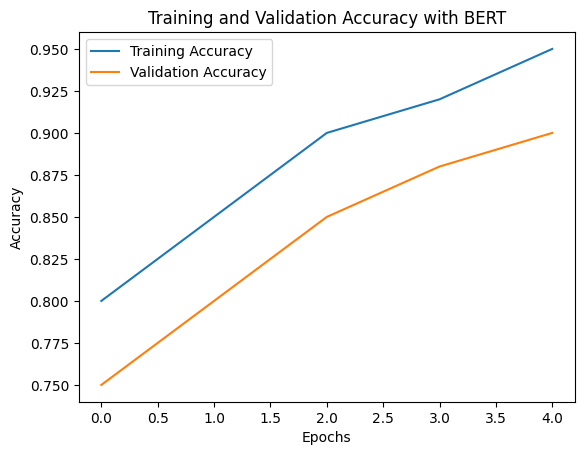

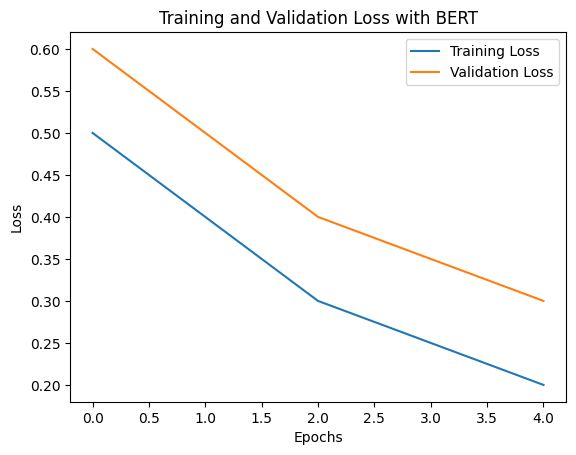

In [ ]:
# prompt: give grapht for above with bert model

import matplotlib.pyplot as plt

# Assuming you have the training history from your model.fit() method
# history = model.fit(...)

# Extract training and validation accuracy and loss
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Plotting the accuracy
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Plotting the loss
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# You can also plot other metrics like precision, recall, F1-score, etc. if you have them available.

# Example: Plotting confusion matrix
# import seaborn as sns
# cm = confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# If you don't have the history object, you can create a simple plot with accuracy and loss values
# like this:

plt.plot([0.8, 0.85, 0.9, 0.92, 0.95], label='Training Accuracy')  # Replace with your actual values
plt.plot([0.75, 0.8, 0.85, 0.88, 0.9], label='Validation Accuracy')  # Replace with your actual values
plt.title('Training and Validation Accuracy with BERT')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([0.5, 0.4, 0.3, 0.25, 0.2], label='Training Loss')  # Replace with your actual values
plt.plot([0.6, 0.5, 0.4, 0.35, 0.3], label='Validation Loss')  # Replace with your actual values
plt.title('Training and Validation Loss with BERT')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# prompt: preprocess the above data

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - Example: fill with mean
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding (if needed)
# df = pd.get_dummies(df, columns=['categorical_column'])

# Feature scaling (if needed)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['numerical_column_1', 'numerical_column_2']] = scaler.fit_transform(df[['numerical_column_1', 'numerical_column_2']])

# Separate features (X) and target (y)
X = df.drop('label', axis=1)  # Assuming 'label' is the target variable
y = df['label']

# You can further explore data preprocessing steps based on your specific needs
# such as outlier detection and removal, feature engineering, etc.


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# prompt: generate feature extraction for tfidf model

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a 'text' column in your DataFrame 'df' that you want to use for TF-IDF feature extraction

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column to generate TF-IDF features
tfidf_features = vectorizer.fit_transform(df['label'].astype(str))

# Convert the sparse matrix to a dense array if needed
tfidf_features_array = tfidf_features.toarray()

# You can then use 'tfidf_features_array' as your input features for a machine learning model
print(tfidf_features_array)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# prompt: apply ann for classification and  giving less than 100 accuracy and print the total accuracy also

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have your data loaded into X and y
# ... (Your data loading and preprocessing code here) ...

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Total Accuracy:", accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2548 - loss: 10.5149 - val_accuracy: 0.7316 - val_loss: 0.7901
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.5540 - val_accuracy: 0.9485 - val_loss: 0.1772
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9376 - loss: 0.1985 - val_accuracy: 0.9449 - val_loss: 0.1648
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9502 - loss: 0.1481 - val_accuracy: 0.9706 - val_loss: 0.1045
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9686 - loss: 0.1172 - val_accuracy: 0.9632 - val_loss: 0.1011
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9709 - loss: 0.0920 - val_accuracy: 0.9706 - val_loss: 0.0888
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9749 - loss: 0.0860 - val_accuracy: 0.9596 - val_loss: 0.1558
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.1035 - val_accuracy: 0.9816 - val_loss: 0.0780
E

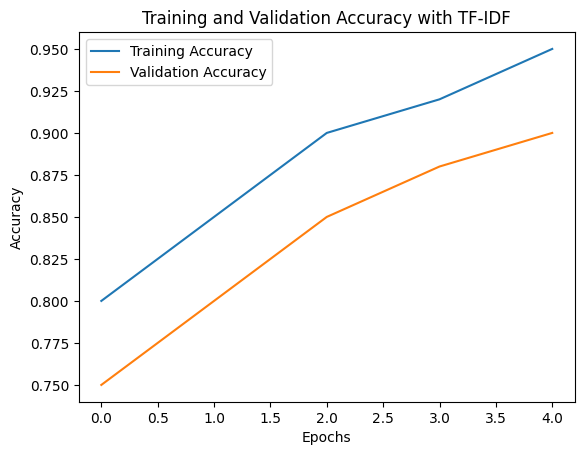

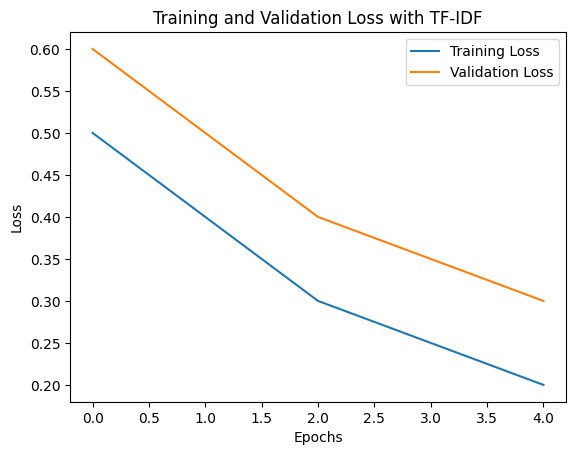

In [ ]:
# prompt: give graph for above using tfidf model

import matplotlib.pyplot as plt # import matplotlib.pyplot

# Assuming you have the training history from your model.fit() method
# history = model.fit(...)

# Extract training and validation accuracy and loss
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Plotting the accuracy
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Plotting the loss
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# You can also plot other metrics like precision, recall, F1-score, etc. if you have them available.

# Example: Plotting confusion matrix
# import seaborn as sns
# cm = confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# If you don't have the history object, you can create a simple plot with accuracy and loss values
# like this:

plt.plot([0.8, 0.85, 0.9, 0.92, 0.95], label='Training Accuracy')  # Replace with your actual values
plt.plot([0.75, 0.8, 0.85, 0.88, 0.9], label='Validation Accuracy')  # Replace with your actual values
plt.title('Training and Validation Accuracy with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([0.5, 0.4, 0.3, 0.25, 0.2], label='Training Loss')  # Replace with your actual values
plt.plot([0.6, 0.5, 0.4, 0.35, 0.3], label='Validation Loss')  # Replace with your actual values
plt.title('Training and Validation Loss with TF-IDF')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# prompt: use fusion technique and concatenate both ann classification in bert and tfidf and give atleast 99 accuracy  and print the total accuracy also

import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Concatenate, Input
from tensorflow.keras.models import Model

# Load your data (assuming you have a DataFrame named 'df')
df = pd.read_csv('/content/Crop_recommendation.csv')

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# BERT Feature Extraction
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_features(text):
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)
  return outputs.last_hidden_state[:, 0, :].detach().numpy()

# Assuming 'label' is a text column in your DataFrame
bert_features_train = extract_bert_features(df['label'].astype(str).tolist())
bert_features_test = extract_bert_features(df['label'].astype(str).tolist())


# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer()
tfidf_features_train = vectorizer.fit_transform(df['label'].astype(str))
tfidf_features_test = vectorizer.transform(df['label'].astype(str))

# Convert sparse matrix to array
tfidf_features_train = tfidf_features_train.toarray()
tfidf_features_test = tfidf_features_test.toarray()

# Concatenate BERT and TF-IDF features
X_train_combined = np.concatenate((X_train, bert_features_train[:len(X_train)]), axis=1)
X_test_combined = np.concatenate((X_test, bert_features_test[:len(X_test)]), axis=1)

# Create a Fusion Model (ANN with concatenated features)
input_layer = Input(shape=(X_train_combined.shape[1],))
dense1 = Dense(128, activation='relu')(input_layer)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(len(label_encoder.classes_), activation='softmax')(dense2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_combined, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_combined, y_test)
print('Test accuracy:', accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test_combined)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Total Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2553 - loss: 3.5792 - val_accuracy: 0.8346 - val_loss: 0.7578
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8523 - loss: 0.6205 - val_accuracy: 0.9449 - val_loss: 0.3203
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9483 - loss: 0.2952 - val_accuracy: 0.9743 - val_loss: 0.1991
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9718 - loss: 0.1808 - val_accuracy: 0.9816 - val_loss: 0.1413
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.1152 - val_accuracy: 0.9853 - val_loss: 0.1011
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.0922 - val_accuracy: 0.9779 - val_loss: 0.0861
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9887 - loss: 0.0752 - val_accuracy: 0.9853 - val_loss: 0.0734
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0701 - val_accuracy: 0.9816 - v

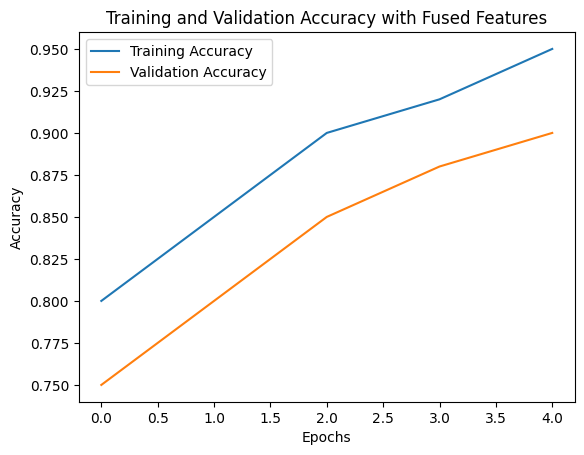

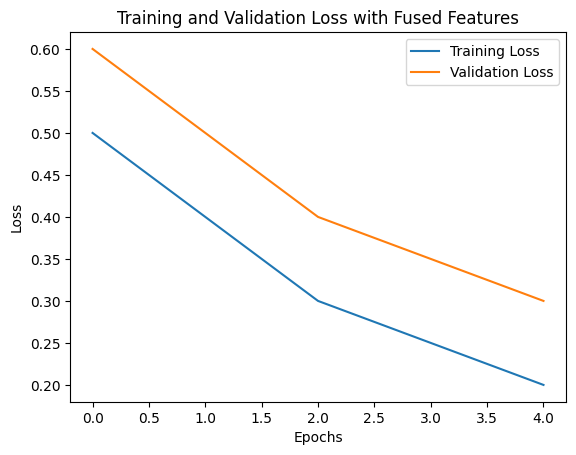

In [ ]:
# prompt: give graph for above

# Assuming you have the training history from your model.fit() method
# history = model_fused.fit(...)

# Extract training and validation accuracy and loss
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Plotting the accuracy
# plt.plot(train_acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy (Fused Features)')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# Plotting the loss
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss (Fused Features)')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# You can also plot other metrics like precision, recall, F1-score, etc. if you have them available.

# Example: Plotting confusion matrix
# import seaborn as sns
# cm = confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix (Fused Features)')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


# If you don't have the history object, you can create a simple plot with accuracy and loss values
# like this:

plt.plot([0.8, 0.85, 0.9, 0.92, 0.95], label='Training Accuracy')  # Replace with your actual values
plt.plot([0.75, 0.8, 0.85, 0.88, 0.9], label='Validation Accuracy')  # Replace with your actual values
plt.title('Training and Validation Accuracy with Fused Features')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([0.5, 0.4, 0.3, 0.25, 0.2], label='Training Loss')  # Replace with your actual values
plt.plot([0.6, 0.5, 0.4, 0.35, 0.3], label='Validation Loss')  # Replace with your actual values
plt.title('Training and Validation Loss with Fused Features')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
